In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
df=pd.read_csv("train[1].csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df["No_of_bathrooms"]=df["FullBath"]

In [ ]:
df["No_of_bathrooms"]

,No_of_bathrooms
0,2
1,2
2,2
3,1
4,2
...,...
1455,2
1456,2
1457,2
1458,1


In [ ]:
df["No_of_bathrooms"].value_counts()

,count
No_of_bathrooms,
2,768
1,650
3,33
0,9


In [ ]:
df["No_of_bathrooms"].isnull().sum()

0

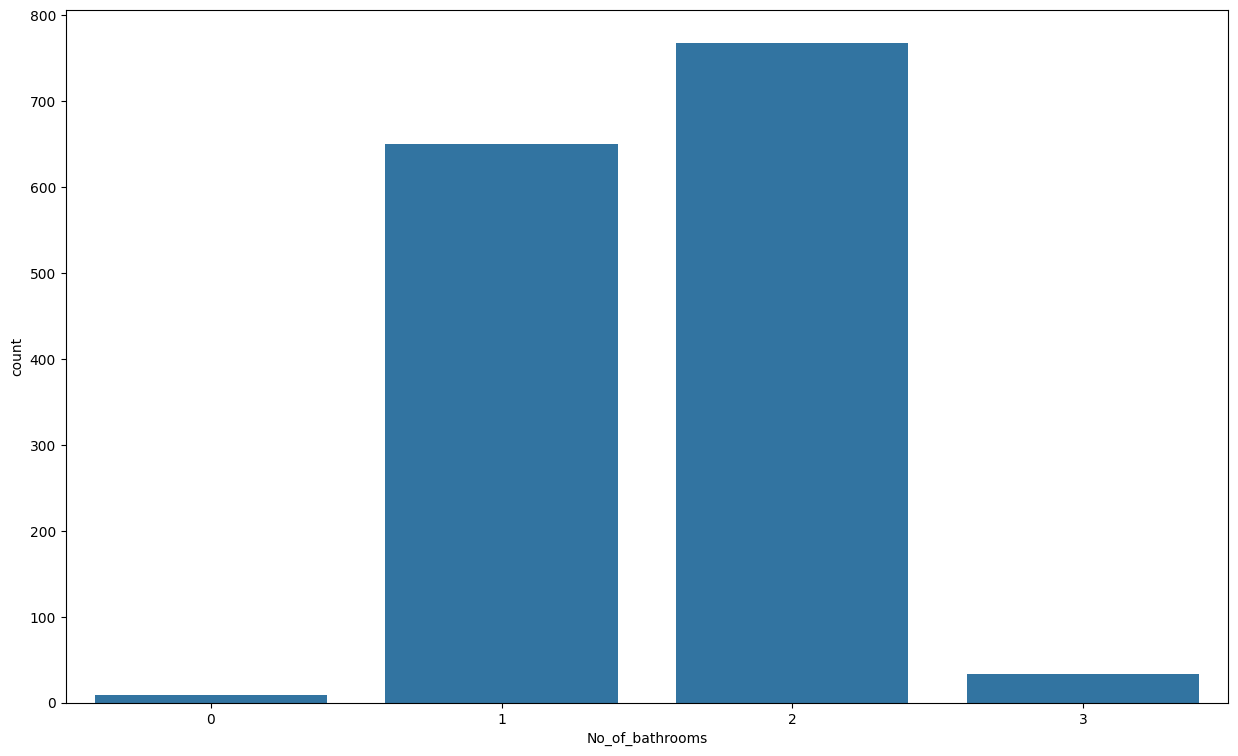

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(df["No_of_bathrooms"].value_counts())
plt.show()

In [ ]:
#Most of the houses have 2 bathrooms


In [ ]:
df["BedroomAbvGr"].value_counts()

,count
BedroomAbvGr,
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


In [ ]:
df["No_of_bedrooms"]=df["BedroomAbvGr"]

In [ ]:
df["No_of_bedrooms"].isna().sum()

0

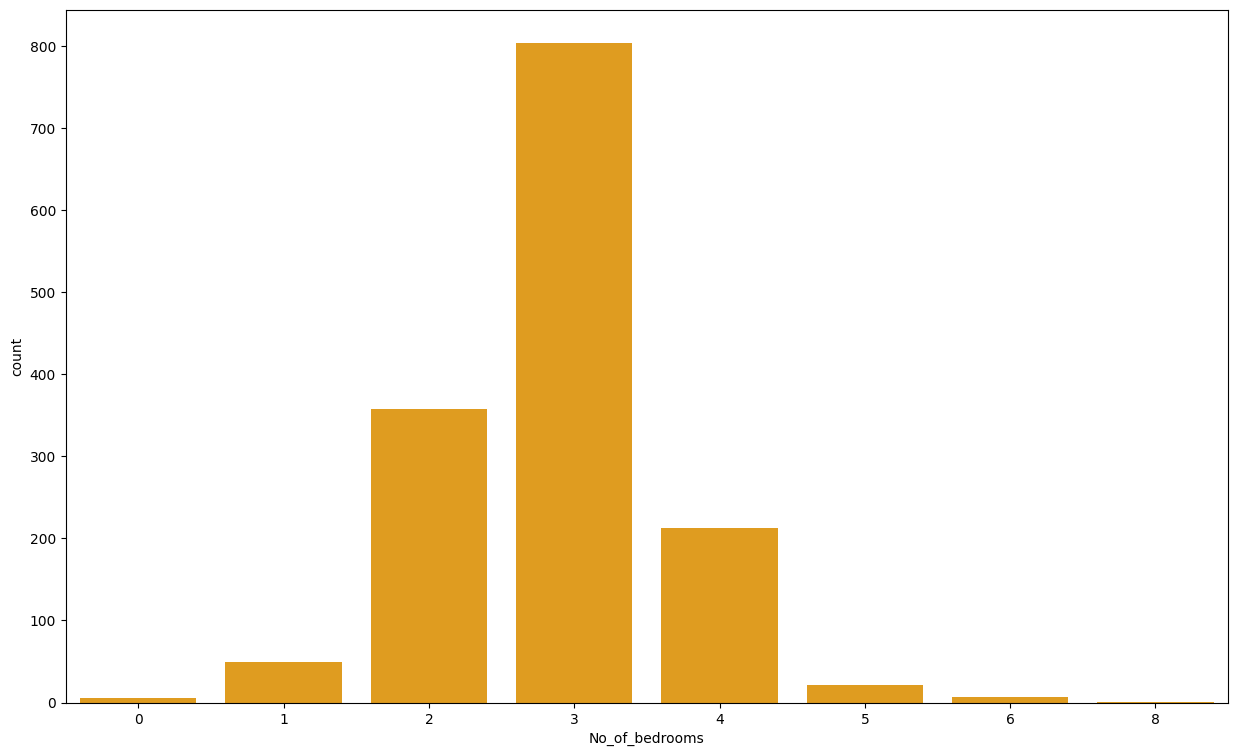

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(df["No_of_bedrooms"].value_counts(),color="orange")
plt.show()

In [ ]:
# Most of the houses have 3 bedrooms
# then 2,then 4
# but only one house has 8 bedrooms

In [ ]:
df["GrLivArea"].value_counts()

,count
GrLivArea,
864,22
1040,14
894,11
1456,10
848,10
...,...
2296,1
1123,1
1199,1


In [ ]:
df["TotalBsmtSF"].isna().sum()

0

In [ ]:
df["square_footage"]=df["GrLivArea"]

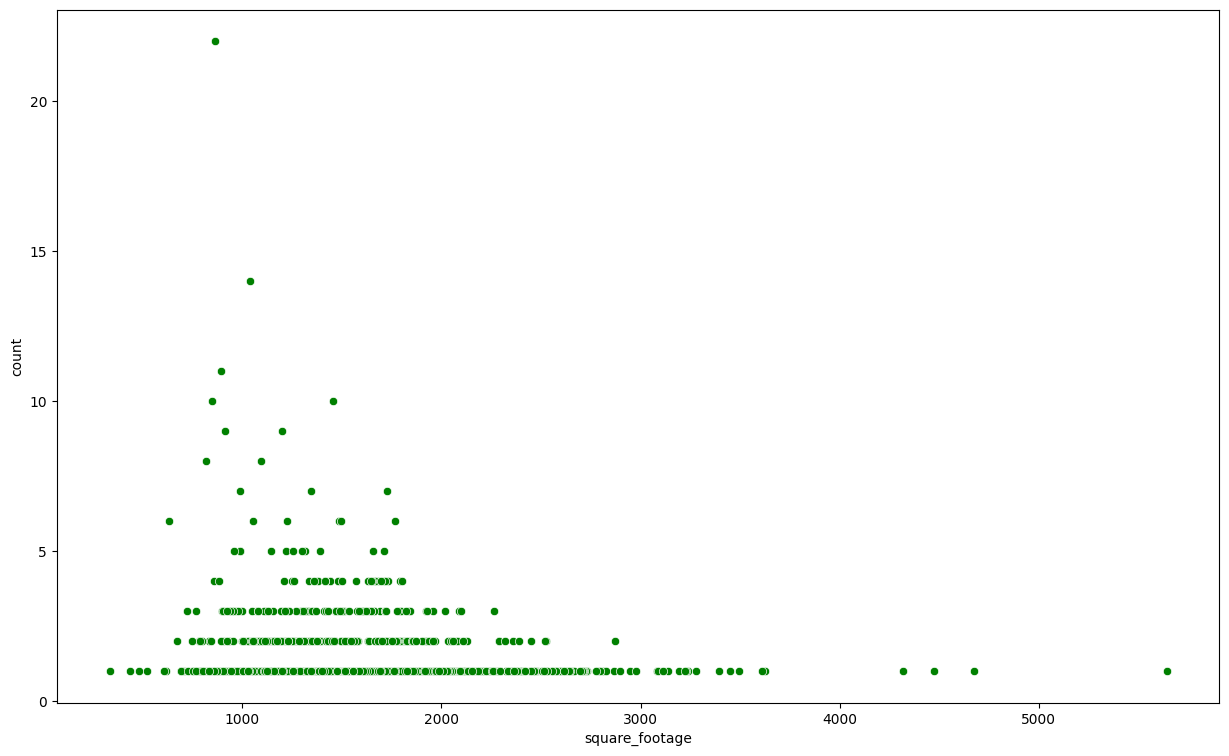

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(df["square_footage"].value_counts(),color="green")
plt.show()

In [ ]:
df["SalePrice"].isna().sum()

0

In [ ]:


fig = px.scatter_3d(df, x='No_of_bathrooms', y='No_of_bedrooms', z='SalePrice',
              color='SaleType')
fig.show()

In [ ]:
df["SalePrice"].value_counts()

,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


<Axes: ylabel='SalePrice'>

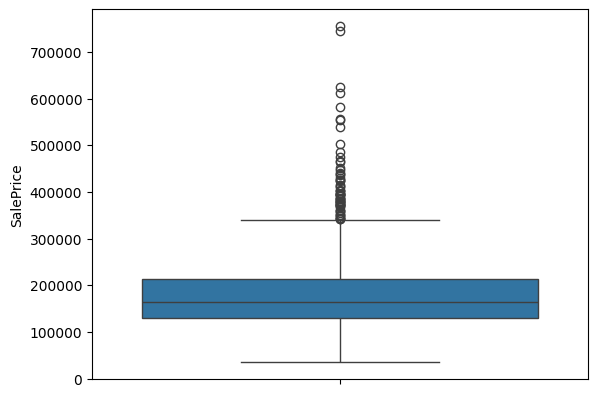

In [ ]:
#outlier detection
#box plot
sns.boxplot(df["SalePrice"])

<Axes: ylabel='No_of_bathrooms'>

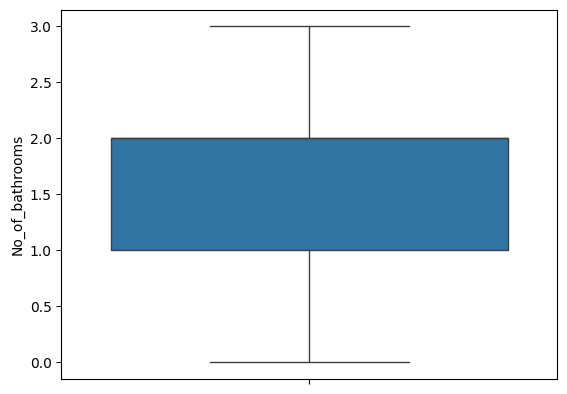

In [ ]:
sns.boxplot(df["No_of_bathrooms"])

<Axes: ylabel='No_of_bedrooms'>

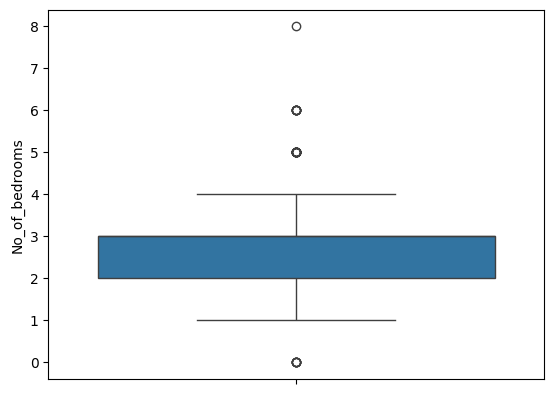

In [ ]:
sns.boxplot(df["No_of_bedrooms"])

<Axes: ylabel='square_footage'>

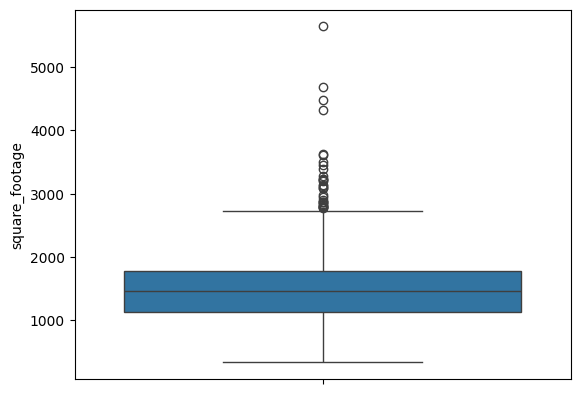

In [ ]:
sns.boxplot(df["square_footage"])

In [ ]:
#outlier treatment
#for No_of_bathrooms
Q1=df['No_of_bathrooms'].quantile(0.25)
Q3=df['No_of_bathrooms'].quantile(0.75)

IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR

In [ ]:
df=df[(df["No_of_bathrooms"]>=lower_fence) & (df["No_of_bathrooms"]<=upper_fence)]

Text(0.5, 1.0, 'the box plot')

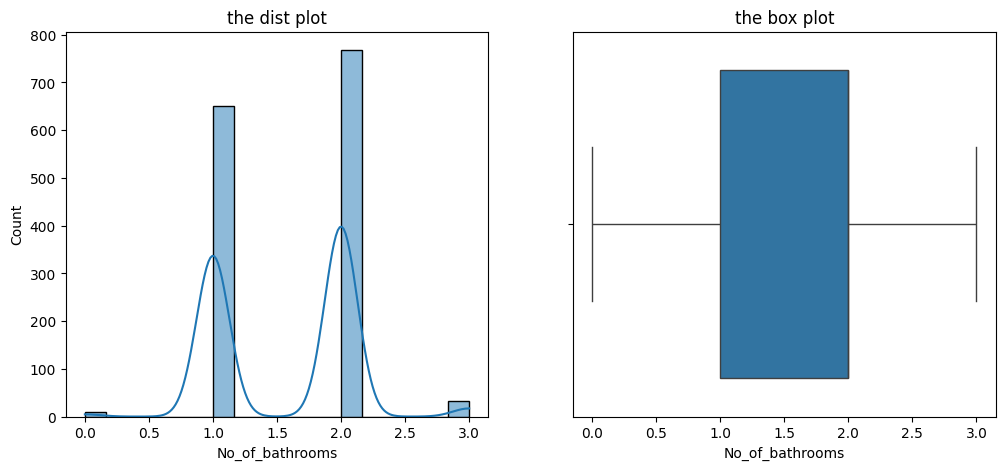

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['No_of_bathrooms'],kde=True)
plt.title('the dist plot')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='No_of_bathrooms')
plt.title('the box plot')

In [ ]:
#outlier treatment
#for No_of_bedrooms
q1=df['No_of_bedrooms'].quantile(0.25)
q3=df['No_of_bathrooms'].quantile(0.75)

iqr=q3-q1
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr

In [ ]:
df=df[(df["No_of_bedrooms"]>=lowerfence) & (df["No_of_bedrooms"]<=upperfence)]

Text(0.5, 1.0, 'the box plot')

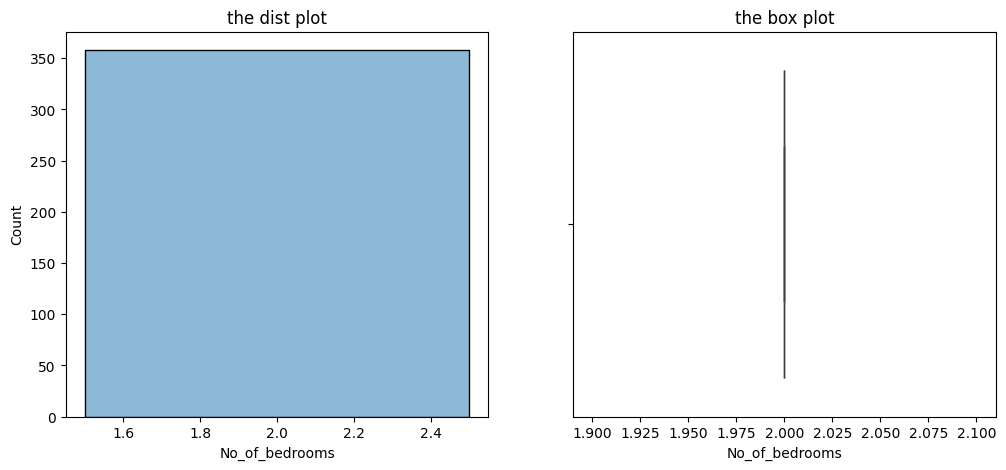

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['No_of_bedrooms'],kde=True)
plt.title('the dist plot')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='No_of_bedrooms')
plt.title('the box plot')

In [ ]:
#outlier treatment
#for saleprice
df['SalePrice']=np.where((df.SalePrice>=upper_fence) | (df.SalePrice<=lower_fence) ,df['SalePrice'].mean(),df['SalePrice'])

Text(0.5, 1.0, 'the box plot of SalePrice')

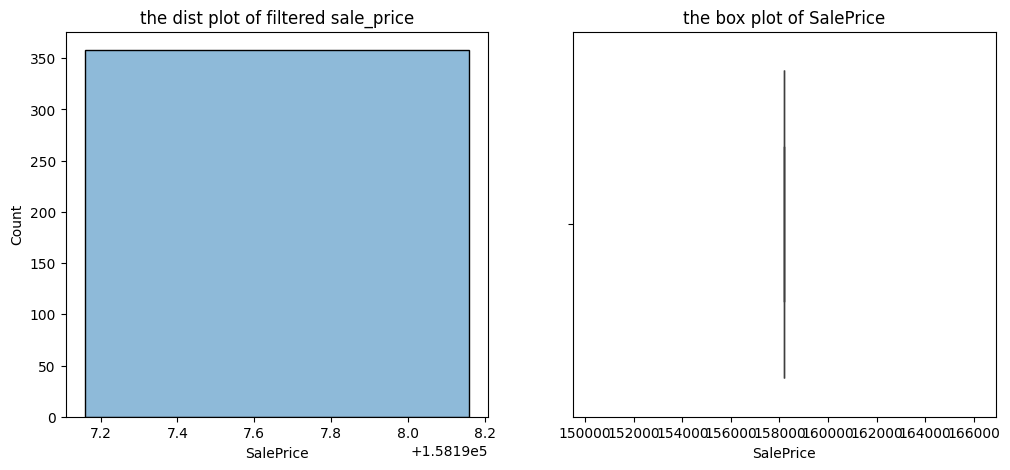

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'],kde=True)
plt.title('the dist plot of filtered sale_price')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='SalePrice')
plt.title('the box plot of SalePrice')

In [ ]:
#outlier treatment
#for square_footage
df['square_footage']=np.where((df["square_footage"]>=upper_fence) | (df["square_footage"]<=lower_fence) ,df['square_footage'].mean(),df['square_footage'])

Text(0.5, 1.0, 'the box plot of square_footage')

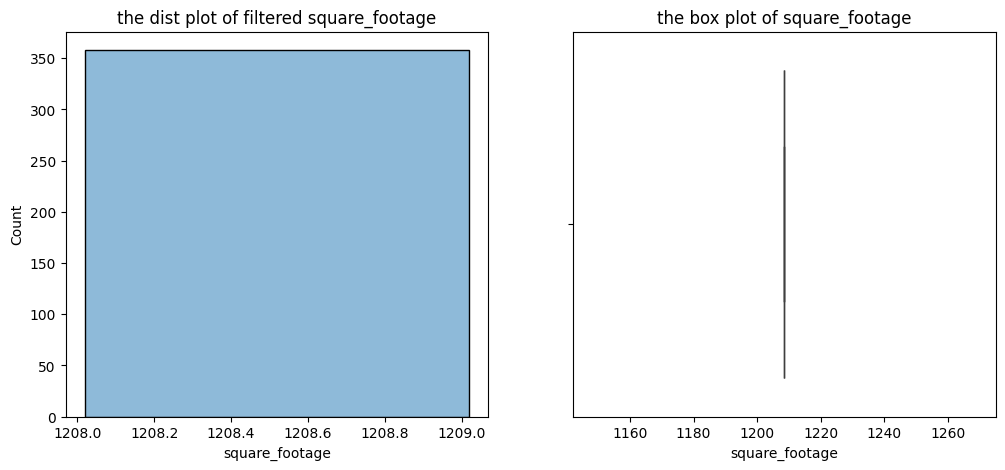

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['square_footage'],kde=True)
plt.title('the dist plot of filtered square_footage')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='square_footage')
plt.title('the box plot of square_footage')

In [ ]:
#now divide data into x and y
x=df[["No_of_bedrooms","No_of_bathrooms","square_footage"]]
y=df["SalePrice"]

In [ ]:
x

,No_of_bedrooms,No_of_bathrooms,square_footage
8,2,2,1208.519553
9,2,1,1208.519553
12,2,1,1208.519553
14,2,1,1208.519553
15,2,1,1208.519553
...,...,...,...
1443,2,1,1208.519553
1448,2,1,1208.519553
1452,2,1,1208.519553
1454,2,2,1208.519553


In [ ]:
y

,SalePrice
8,158197.659218
9,158197.659218
12,158197.659218
14,158197.659218
15,158197.659218
...,...
1443,158197.659218
1448,158197.659218
1452,158197.659218
1454,158197.659218


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

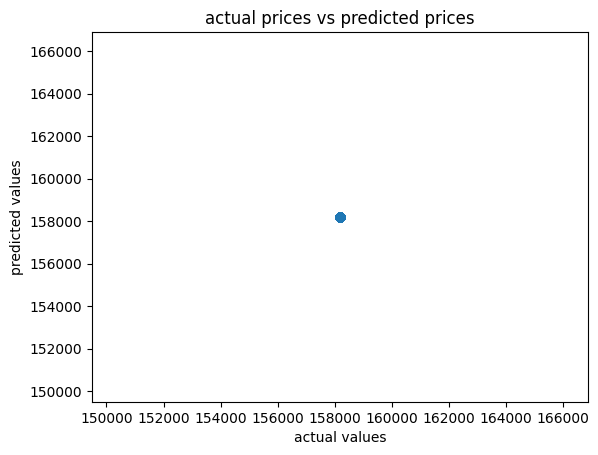

In [ ]:
#plotting predictions against actual values
plt.scatter(y_test,y_pred)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("actual prices vs predicted prices")
plt.show()

In [ ]:
#my model is 100% accurate

In [ ]:
#check on new data
new_data=pd.DataFrame({"No_of_bedrooms":[3],"No_of_bathrooms":[2],"square_footage":[1000]})
predicted_price=lr.predict(new_data)
print(predicted_price)

[158197.65921788]
